<a href="https://colab.research.google.com/github/xteox017/Sintesis-de-reuniones-con-IA-Equipo-31-TEC/blob/main/Avance4_Equipo31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maestría en Inteligencia Artificial Aplicada**

PROYECTO INTEGRADOR

Avance 4. Modelos alternativos

Equipo 31

JUAN CARLOS VILLAMIL ROJAS A01794003

MATEO CRUZ LANCHERO A01793882

ANDREA MARGARITA OSORIO GONZÁLEZ A01104776

26/5/2024

**Avance #4**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Paso 1: Carga de datos y preprocesamiento
Paso 2: Vectorización TF-IDF
Paso 3: Cálculo de frecuencia de palabras por reunión
Paso 4: Búsqueda de mejores umbrales


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Mejores umbrales: (3, 10)
Mejores Modelos: [('Logistic Regression', {'accuracy': 0.7333333333333333, 'precision': 0.7333333333333333, 'recall': 1.0, 'f1': 0.8400000000000001}), ('Multinomial NB', {'accuracy': 0.7333333333333333, 'precision': 0.7333333333333333, 'recall': 1.0, 'f1': 0.8400000000000001})]
Paso 5: Entrenamiento y evaluación del modelo final
Modelo Final: LogisticRegression(C=0.1)
Accuracy: 0.7500
Precision: 0.7500
Recall: 1.0000
F1 Score: 0.8571


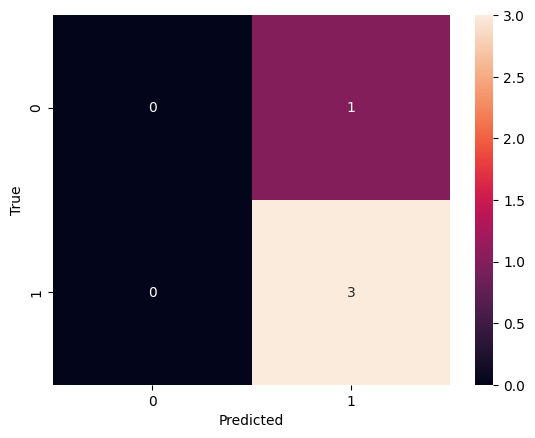

Palabras clave relevantes según Chi-cuadrado: ['000' '1' '10' '100' '15' '19' '2' '20' '3' '30' '5' '50' '6' '7' '80'
 'abigail' 'acceso' 'acerca' 'acercamiento' 'actividad' 'actividades'
 'actualmente' 'acuerdo' 'acá' 'además' 'administración' 'afecta']


In [4]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from google.colab import drive
drive.mount('/content/drive')

def load_transcriptions(data_path):
    archivos = [f for f in os.listdir(data_path) if f.endswith('.txt')]
    transcripciones = []
    for archivo in archivos:
        with open(os.path.join(data_path, archivo), 'r', encoding='utf-8') as f:
            texto = f.read()
            transcripciones.append(texto)
    return transcripciones

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    return ' '.join(tokens)

print("Paso 1: Carga de datos y preprocesamiento")
data_path = '/content/drive/My Drive/Transcriptions/'
transcripciones = load_transcriptions(data_path)

stop_words = set(stopwords.words('spanish'))
stop_words.update(['eh', 'si', 'va', 'pues', 'entonces', '...', '.', ',', ''])

transcripciones_preprocesadas = []
for texto in transcripciones:
    texto_preprocesado = preprocess_text(texto)
    transcripciones_preprocesadas.append(texto_preprocesado)

# Guardar las transcripciones preprocesadas en un archivo
with open('transcripciones_preprocesadas.txt', 'w', encoding='utf-8') as f:
    for i, transcripcion in enumerate(transcripciones_preprocesadas, start=1):
        f.write(f"Transcripción {i}:\n")
        f.write(transcripcion)
        f.write("\n\n")

print("Paso 2: Vectorización TF-IDF")
tfidf_vectorizer = TfidfVectorizer(max_features=1000, token_pattern=r'\b\w+\b', ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(transcripciones_preprocesadas)

print("Paso 3: Cálculo de frecuencia de palabras por reunión")
frecuencia_palabras_por_reunion = []
for texto_preprocesado in transcripciones_preprocesadas:
    tokens = texto_preprocesado.split()
    frecuencia_palabras_reunion = Counter(tokens)
    frecuencia_palabras_por_reunion.append(frecuencia_palabras_reunion)

df_frecuencias = pd.DataFrame(frecuencia_palabras_por_reunion)
df_frecuencias = df_frecuencias.fillna(0)
varianzas = df_frecuencias.var()
palabras_clave = varianzas.sort_values(ascending=False).index[:10]

print("Paso 4: Búsqueda de mejores umbrales")
parametros_umbral = {
    'umbral_bajo': [3, 5, 7],
    'umbral_medio': [10, 12, 15]
}

mejor_accuracy = 0
mejor_umbrales = None

resultados = {}  # Inicialización de la variable resultados

for umbral_bajo in parametros_umbral['umbral_bajo']:
    for umbral_medio in parametros_umbral['umbral_medio']:
        frecuencia_palabras_clave = []
        for frecuencia_palabras_reunion in frecuencia_palabras_por_reunion:
            frecuencia_palabras_clave_reunion = sum(frecuencia_palabras_reunion[palabra] for palabra in palabras_clave)
            frecuencia_palabras_clave.append(frecuencia_palabras_clave_reunion)

        df_features = pd.DataFrame()
        df_features['frecuencia_palabras_clave'] = frecuencia_palabras_clave
        df_features['clasificacion'] = pd.cut(df_features['frecuencia_palabras_clave'], bins=[0, umbral_bajo, umbral_medio, np.inf], labels=['Bajo', 'Medio', 'Alto'])

        selector_varianza = VarianceThreshold(threshold=0.005)
        tfidf_matrix_varianza = selector_varianza.fit_transform(tfidf_matrix)

        target = df_features['clasificacion'] == 'Alto'
        selector_chi2 = SelectKBest(chi2, k='all')
        selector_chi2.fit(tfidf_matrix_varianza, target)
        features_seleccionadas_chi2 = selector_chi2.transform(tfidf_matrix_varianza)

        palabras_seleccionadas_chi2 = tfidf_vectorizer.get_feature_names_out()[selector_chi2.get_support(indices=True)]

        df_features['target'] = np.where(df_features['clasificacion'] == 'Alto', 1, 0)

        X_train, X_test, y_train, y_test = train_test_split(features_seleccionadas_chi2, df_features['target'], test_size=0.2, random_state=42)

        # Convertir X_train, X_test, y_train y y_test a numpy arrays
        X_train = X_train.toarray()
        X_test = X_test.toarray()
        y_train = y_train.to_numpy()
        y_test = y_test.to_numpy()

        modelos = {
            'Logistic Regression': LogisticRegression(),
            'Multinomial NB': MultinomialNB(),
            'SVM': SVC(),
            'Decision Tree': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(),
            'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        }

        mejor_modelo = None
        mejor_accuracy_modelo = 0

        for nombre, modelo in modelos.items():
            kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            accuracies = []
            precisions = []
            recalls = []
            f1s = []

            for train_index, val_index in kfold.split(X_train, y_train):
                X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
                y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

                modelo.fit(X_train_fold, y_train_fold)
                y_pred_val = modelo.predict(X_val_fold)
                accuracies.append(accuracy_score(y_val_fold, y_pred_val))
                precisions.append(precision_score(y_val_fold, y_pred_val))
                recalls.append(recall_score(y_val_fold, y_pred_val))
                f1s.append(f1_score(y_val_fold, y_pred_val))

            accuracy_promedio = np.mean(accuracies)
            precision_promedio = np.mean(precisions)
            recall_promedio = np.mean(recalls)
            f1_promedio = np.mean(f1s)

            if accuracy_promedio > mejor_accuracy_modelo:
                mejor_accuracy_modelo = accuracy_promedio
                mejor_modelo = modelo

            resultados[nombre] = {
                'accuracy': accuracy_promedio,
                'precision': precision_promedio,
                'recall': recall_promedio,
                'f1': f1_promedio
            }

        if mejor_accuracy_modelo > mejor_accuracy:
            mejor_accuracy = mejor_accuracy_modelo
            mejor_umbrales = (umbral_bajo, umbral_medio)

print(f"Mejores umbrales: {mejor_umbrales}")

print("Mejores Modelos:", sorted(resultados.items(), key=lambda x: x[1]['f1'], reverse=True)[:2])

print("Paso 5: Entrenamiento y evaluación del modelo final")
frecuencia_palabras_clave = []
for frecuencia_palabras_reunion in frecuencia_palabras_por_reunion:
    frecuencia_palabras_clave_reunion = sum(frecuencia_palabras_reunion[palabra] for palabra in palabras_clave)
    frecuencia_palabras_clave.append(frecuencia_palabras_clave_reunion)

df_features = pd.DataFrame()
df_features['frecuencia_palabras_clave'] = frecuencia_palabras_clave
df_features['clasificacion'] = pd.cut(df_features['frecuencia_palabras_clave'], bins=[0, mejor_umbrales[0], mejor_umbrales[1], np.inf], labels=['Bajo', 'Medio', 'Alto'])

target = df_features['clasificacion'] == 'Alto'
selector_chi2 = SelectKBest(chi2, k='all')
selector_chi2.fit(tfidf_matrix_varianza, target)
features_seleccionadas_chi2 = selector_chi2.transform(tfidf_matrix_varianza)

palabras_seleccionadas_chi2 = tfidf_vectorizer.get_feature_names_out()[selector_chi2.get_support(indices=True)]

df_features['target'] = np.where(df_features['clasificacion'] == 'Alto', 1, 0)

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_seleccionadas_chi2, df_features['target'], test_size=0.2, random_state=42)

# Convertir X_train, X_test, y_train y y_test a numpy arrays
X_train = X_train.toarray()
X_test = X_test.toarray()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Ajuste de hiperparámetros para los dos mejores modelos
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 6, 10]}
}

mejor_modelo_final = None
mejor_score = 0

# Asignar los modelos a sus nombres correctos
modelos = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for nombre, params in param_grid.items():
    if nombre in [modelo[0] for modelo in sorted(resultados.items(), key=lambda x: x[1]['f1'], reverse=True)[:2]]:
        grid_search = GridSearchCV(modelos[nombre], param_grid=params, cv=5, scoring='f1')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        score = f1_score(y_test, y_pred)
        if score > mejor_score:
            mejor_score = score
            mejor_modelo_final = best_model

# Evaluación del modelo final
y_pred_final = mejor_modelo_final.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)

print(f"Modelo Final: {mejor_modelo_final}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(f"Palabras clave relevantes según Chi-cuadrado: {palabras_seleccionadas_chi2}")
